In [1]:
####################################################################################
#
#                VietorisRipsComplex
#
####################################################################################
#TODO:
#
#Input: np array of coordinate : [[1,2],[2,3]] 2D for now
#
#Output: 绘制，边的坐标，边的index
#
#Example:
#
# complex = VietorisRipsComplex(points, r)# r为RV复形的球的半径
# edge_list_position = complex.edge()#返回边上二点的坐标
# complex.edge_index() #返回边，以点对的形式，eg：[[1,2]] 代表点1和2间存在边
# complex.draw_complex() #绘制
####################################################################################
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt


class VietorisRipsComplex:
    def __init__(self, data, distance) -> None:
        # lets data X a set finite in R^d
        self.data = data.tolist()
        self.distance = distance
        self.result = []
        self.binary_intersections = []
        self.triple_intersections = []

    @staticmethod
    def distance_btp(p1, p2):
        r0 = pow((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2, 0.5)
        return r0

    def control_intersection_binary(self):
        combs = list(itertools.combinations(self.data, 2))
        unique_combs = [list(comb) for comb in combs if comb[0] != comb[1]]
        result_ = list(filter(lambda p: self.distance_btp(p[0], p[1]) < 2*self.distance, unique_combs))
        return result_

    def control_intersection_triple(self):
        self.binary_intersections = self.control_intersection_binary()
        result_ = []
        for p12 in self.binary_intersections:
            list_p1 = [p[1] for p in self.binary_intersections if p12[0] == p[0]]
            list_p2 = [p[1] for p in self.binary_intersections if p12[1] == p[0]]
            intersect = [p for p in list_p1 if p in list_p2]
            if intersect:
                k = [[p12[0], p12[1], intersect[i]] for i in range(len(intersect))]
                result_.extend(k)

        self.triple_intersections = result_
        return result_

    def draw_complex(self):
        self.control_intersection_triple()
        if self.triple_intersections:
            fig, ax = plt.subplots(figsize=(16, 9))
            for points in self.triple_intersections:
                for point in points:
                    color = np.random.rand(3)
                    circle = plt.Circle(point, self.distance, fill=False, edgecolor=color)
                    ax.add_artist(circle)
                x = [p[0] for p in points]
                y = [p[1] for p in points]
                ax.plot(x, y, 'bo')
                x.append(self.triple_intersections[0][0][0])
                y.append(self.triple_intersections[0][0][1])
                edge = plt.Line2D(x, y, color=np.random.rand(3, ))
                ax.add_artist(edge)


            for points in self.binary_intersections:
                for point in points:
                    color = np.random.rand(3)
                    circle = plt.Circle(point, self.distance, fill=False, edgecolor=color)
                    ax.add_artist(circle)
                x = [p[0] for p in points]
                y = [p[1] for p in points]
                ax.plot(x, y, 'bo')
                edge = plt.Line2D(x, y, color=np.random.rand(3, ))
                ax.add_artist(edge)

            x_cor = [p[0] for p in self.data]
            y_cor = [p[1] for p in self.data]
            ax.set_xlim(min(x_cor) - 2 * self.distance, max(x_cor) + 2 * self.distance)
            ax.set_ylim(min(y_cor) - 2 * self.distance, max(y_cor) + 2 * self.distance)

            self.drawData()
            self.drawSimplex()
            plt.show()
        else:
            self.drawData()
            self.drawSimplex()

    def drawSimplex(self):
        self.control_intersection_triple()
        fig, ax = plt.subplots(figsize=(16, 9))
        for points in self.binary_intersections:
            x = [p[0] for p in points]
            y = [p[1] for p in points]
            ax.plot(x, y, 'bo')
            edge = plt.Line2D(x, y, color=np.random.rand(3, ))
            ax.add_artist(edge)

        for i in self.triple_intersections:
            x = [p[0] for p in i]
            y = [p[1] for p in i]
            x.append(x[0])
            y.append(y[0])
            ax.fill(x, y, facecolor='grey', alpha=0.4)

        x_cor = [p[0] for p in self.data]
        y_cor = [p[1] for p in self.data]
        ax.plot(x_cor, y_cor, 'yo')
        ax.set_xlim(min(x_cor) - 2 * self.distance, max(x_cor) + 2 * self.distance)
        ax.set_ylim(min(y_cor) - 2 * self.distance, max(y_cor) + 2 * self.distance)

        plt.show()

    def drawData(self):
        x = [p[0] for p in self.data]
        y = [p[1] for p in self.data]
        fig, ax = plt.subplots(figsize=(16, 9))
        ax.plot(x, y, 'ro')
        ax.set_xlim(min(x) - 2 * self.distance, max(x) + 2 * self.distance)
        ax.set_ylim(min(y) - 2 * self.distance, max(y) + 2 * self.distance)
        plt.show()
    def edge(self):
      self.control_intersection_triple()
      edge_list = []
      for points in self.binary_intersections:
        edge_list.append(points)

      return edge_list
    def edge_index(self):

      def find_point_index(point_set, target_point):
        for index, point in enumerate(point_set):
          if np.allclose(point, target_point):
            return index
        print("Point not found in the point set.")
        return None
      edge_list_index = []
      for edge in self.edge():
        indexi = find_point_index(self.data, edge[0])
        indexj = find_point_index(self.data, edge[1])
        #edge_matrix[indexi,indexj] = 1
        #edge_matrix[indexj,indexi] = 1
        edge_list_index.append([indexi,indexj])
      return edge_list_index



In [2]:
####################################################################################
#
#                DelaunayComplex
#
####################################################################################
#TODO:
#
#Input: np array of coordinate : [[1.1, 2.2],[2.3, 3.5]] 2D for now
#
#Output: 绘制，边的坐标，边的index
#
#Example:
#
# complex = DelaunayComplex(np.array(data),r) # r 代表complex中的边长最大值
# edge_list_position = complex.edge()#返回边上二点的坐标
# complex.edge_index() #返回边，以点对的形式，eg：[[1,2]] 代表点1和2间存在边
# complex.draw_complex() #绘制
####################################################################################
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

class DelaunayComplex:

    def __init__(self, data, max_r) -> None:
        # lets data X a set finite in R^d
        self.data = data
        self.simplices = Delaunay(self.data).simplices
        self.max_r = max_r

    def mesh(self):
      return self.simplices



    def edge_index(self):
      def distance_btp(p1, p2):
        r0 = pow((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2, 0.5)
        return r0

      #simplices = Delaunay(self.data).simplices
      a = self.simplices
      #print(a)
      n = len(self.data.tolist())

      edge_matrix = zeros_array = np.zeros((n, n))

      for triangle in self.simplices:
        edge_matrix[triangle[0], triangle[1]] = 1
        edge_matrix[triangle[0], triangle[2]] = 1
        edge_matrix[triangle[1], triangle[2]] = 1
        edge_matrix[triangle[1], triangle[0]] = 1
        edge_matrix[triangle[2], triangle[0]] = 1
        edge_matrix[triangle[2], triangle[1]] = 1

      #print(edge_matrix)
      edge_list_index = []

      for  i in range(n):
        for j in range(i):
          if edge_matrix[i, j] == 1:
            #print(self.data[i],self.data[j])
            if(distance_btp(self.data[i],self.data[j]) < self.max_r):
              edge_list_index.append([i,j])


      return edge_list_index
    def draw_complex(self):
      for edge in self.edge_index():
        plt.plot(self.data[edge, 0], self.data[edge, 1],color= 'blue')
      #plt.triplot(self.data[:, 0], self.data[:, 1], self.simplices)
      plt.scatter(self.data[:, 0], self.data[:, 1], color='r')
      plt.show()

In [3]:
####################################################################################
#
#               HyperCube Cover
#
####################################################################################
#Input: 点坐标和边(with length),
#Output: 生成一组cover，X0,...,Xn
#    cover格式契合BlowupComplex的输入格式，[[point1], [point2], ..., [pointi, pointj],...]，可直接作为BlowupComplex的输入
#
####################################################################################
import random
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt



class HyperCube:

    def __init__(self, point, edge, N, M, r) -> None:
      self.point = point #一组带坐标的点,numpy array
      self.edge = edge #edge_index,调用端点坐标时使用 self.point[self.edge[i][0]], self.point[self.edge[i][1]]
      self.N = N #x方向cover个数
      self.M = M #y方向cover个数
      self.r = r #0-2,overlapping degree
      self.edge_matrix= zeros_array = np.zeros((len(self.point),len(self.point)))
      self.bounder_list_x = []
      self.bounder_list_y = []
      for edge in self.edge:
        self.edge_matrix[edge[0],edge[1]] = 1
        self.edge_matrix[edge[1],edge[0]] = 1

    def distance_btp(p1, p2):
      r0 = pow((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2, 0.5)
      return r0

    def cover(self):
      cover = []

      max_x = max(self.point[:,0])
      min_x = min(self.point[:,0])
      max_y = max(self.point[:,1])
      min_y = min(self.point[:,1])
      range_x = (max_x - min_x)/self.N
      range_y = (max_y - min_y)/self.M

      cover_x = []
      #print(type(self.N))
      for i in range(self.N):
        cover_x.append([])
        self.bounder_list_x.append([min_x + i * range_x - range_x*self.r/2,
                                    min_x + (i+1)*range_x + range_x*self.r/2])
        #print(min_x + (i+1)*range_x + range_x*self.r , min_x + i * range_x)
        for j, point in enumerate(self.point):

          if ((min_x + (i+1)*range_x + range_x*self.r/2) >= point[0] >= (min_x + i*range_x-range_x*self.r/2)):
            cover_x[i].append([j])

      cover_y = []
      for i in range(self.M):
        cover_y.append([])
        self.bounder_list_y.append([min_y + i * range_y - range_y*self.r/2,
                                    min_y + (i+1)*range_y + range_y*self.r/2])
        #print(min_y + (i+1)*range_y + range_y*self.r , min_y + i * range_y)
        for j, point in enumerate(self.point):
          if ((min_y + (i+1)*range_y + range_y*self.r/2) >= point[1] >= (min_y + i * range_y - range_y*self.r/2)):
            cover_y[i].append([j])

      cover = [[] for _ in range(self.N * self.M)]
      i = 0


      for x in range(self.N):
        for y in range(self.M):
          for point in cover_x[x]:
            if point in cover_y[y]:
              cover[i].append(point)

          i = i+1


      step_cover = cover
      for j in range(len(step_cover)):

        step_edge_matrix = self.edge_matrix

        for k in range(len(step_cover[j])):

          for i in range(len(self.point)):

            #print(i,j)
            if step_edge_matrix[step_cover[j][k][0],i] == 1 and step_edge_matrix[i,step_cover[j][k][0]] == 1 and [i] in step_cover[j]:
              if step_cover[j][k][0] < i:
                if [step_cover[j][k][0],i] in cover[j]:
                  continue
                else:
                  cover[j].append([step_cover[j][k][0],i])
              else:
                if [i, step_cover[j][k][0]] in cover[j]:
                  continue
                else:
                  cover[j].append([i,step_cover[j][k][0]])
      return cover

    def draw_cover(self):


        #print(self.bounder_list_x)
        #print(self.bounder_list_y)
        for i in range(self.N):
          for j in range(self.M):
            x1, y1 = self.bounder_list_x[i][0], self.bounder_list_y[j][0]
            x2, y2 = self.bounder_list_x[i][1], self.bounder_list_y[j][1]
            plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'ro-',alpha = 0.5,
                     color = [ round(i/self.N, 1),round(j/self.M, 1),round(i*j/(self.N*self.M),1)])
        #print(self.edge)
        for edge in self.edge:

          plt.plot(self.point[edge, 0], self.point[edge, 1],color= 'blue')
          #plt.triplot(self.data[:, 0], self.data[:, 1], self.simplices)
        plt.scatter(self.point[:, 0], self.point[:, 1], color='r')
        plt.show()

        return 0






In [4]:
class MorseFunction:
    def __init__(self, point, edge, N, r, direction) -> None:
      self.point = point #一组带坐标的点
      self.edge = edge #edge_index,调用端点坐标时使用 self.point[self.edge[i][0]], self.point[self.edge[i][1]]
      self.N = N #想要的cover个数
      self.r = r #overlapping
      self.direction = direction #在哪个方向上做morse function

      self.edge_matrix= zeros_array = np.zeros((len(self.point),len(self.point)))
      for edge in self.edge:
        self.edge_matrix[edge[0],edge[1]] = 1
        self.edge_matrix[edge[1],edge[0]] = 1
      self.bounder_list = []

    def distance_btp(p1, p2):
      r0 = pow((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2, 0.5)
      return r0



    def cover(self):
      filter = 0 if self.direction == "x"else 1
      max_p = max(self.point[:,filter])
      min_p = min(self.point[:,filter])
      '''
      for point in self.point:
        max = point[filter] if point[filter] > max else max
        min = point[filter] if point[filter] < min else min
      '''
      range_btp = (max_p-min_p)/self.N
      #print(max_p,min_p,range_btp)


      cover = []

      for i in range(self.N):
        self.bounder_list.append([max_p + (self.r - i)*range_btp, max_p - (self.r + i + 1)*range_btp])
        cover.append([])
        print(i,[max_p + (self.r - i)*range_btp, max_p - (self.r + i + 1)*range_btp])
        for j, point in enumerate(self.point):
          if ((max_p + (self.r - i)*range_btp) >= point[filter] >= (max_p - (self.r + i + 1)*range_btp)):
            cover[i].append([j])

      step_cover = cover
      for j in range(len(step_cover)):

        step_edge_matrix = self.edge_matrix

        for k in range(len(step_cover[j])):

          for i in range(len(self.point)):

            #print(i,j)
            if step_edge_matrix[step_cover[j][k][0],i] == 1 and step_edge_matrix[i,step_cover[j][k][0]] == 1 and [i] in step_cover[j]:
              if step_cover[j][k][0] < i:
                if [step_cover[j][k][0],i] in cover[j]:
                  continue
                else:
                  cover[j].append([step_cover[j][k][0],i])
              else:
                if [i, step_cover[j][k][0]] in cover[j]:
                  continue
                else:
                  cover[j].append([i,step_cover[j][k][0]])
      return cover


    def draw_cover(self):
      i = 0

      if self.direction == "x":
        for x_axis in self.bounder_list:
          print(x_axis)
          color_x = np.random.rand(3)
          plt.axvline(x = x_axis[0], color = color_x, alpha = 0.5)#[round((random_integer+i*i)/(10+i*i),1),round(i/(10+i),1),random_integer/10])
          plt.axvline(x = x_axis[1], color = color_x, alpha = 0.5)
          i = i+1
      else:
        for y_axis in self.bounder_list:
          color_y = np.random.rand(3)
          plt.axhline(y = y_axis[0], color = color_y, alpha = 0.5)
          plt.axhline(y = y_axis[1], color = color_y, alpha = 0.5)
          i = i+1
      for edge in self.edge:

        plt.plot(self.point[edge, 0], self.point[edge, 1],color= 'blue')
        #plt.triplot(self.data[:, 0], self.data[:, 1], self.simplices)
        plt.scatter(self.point[:, 0], self.point[:, 1], color='r')
      plt.show()
      return 0

edge list: [[3, 2], [4, 1], [5, 4], [7, 3], [8, 5], [9, 4], [9, 5], [9, 8], [10, 6], [10, 8], [11, 1], [11, 4], [12, 3], [12, 7], [13, 8], [13, 9], [14, 4], [14, 9], [16, 4], [16, 5], [16, 11], [17, 16], [18, 7], [18, 12], [19, 6], [19, 12], [19, 18], [20, 2], [20, 3], [20, 7], [21, 0], [21, 6], [21, 8], [21, 10], [22, 0], [22, 8], [22, 13], [22, 21], [23, 2], [23, 15], [23, 20], [24, 2], [24, 15], [24, 23], [25, 2], [25, 15], [25, 16], [25, 17], [26, 10], [26, 12], [26, 19], [27, 2], [27, 15], [27, 24], [27, 25], [28, 0], [28, 6], [28, 21], [29, 6], [29, 10], [29, 19], [29, 26], [30, 9], [30, 13], [30, 14], [31, 4], [31, 14], [34, 1], [34, 11], [37, 33], [37, 34], [38, 35], [39, 1], [39, 11], [39, 34], [40, 33], [40, 37], [41, 11], [41, 16], [41, 17], [41, 34], [42, 35], [43, 36], [44, 32], [46, 32], [46, 36], [47, 32], [47, 36], [47, 43], [47, 45], [48, 17], [48, 33], [48, 37], [49, 30], [49, 45], [50, 43], [50, 45], [50, 47], [50, 49], [51, 13], [51, 30], [51, 49], [51, 50], [52, 37

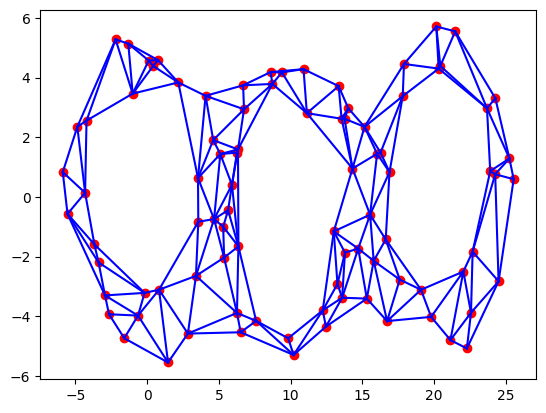

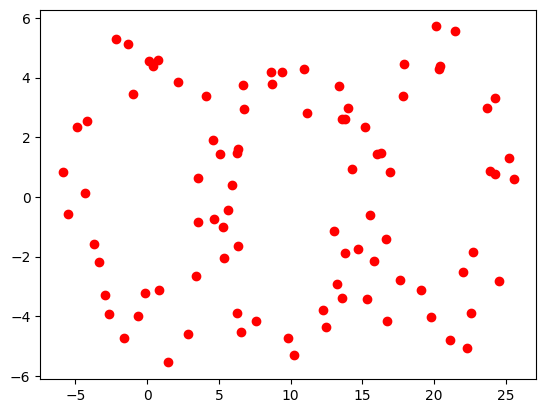

HyperCube cover:
 [[[0], [4], [5], [6], [8], [9], [10], [13], [19], [21], [22], [26], [28], [29], [0, 21], [0, 22], [0, 28], [4, 5], [4, 9], [5, 8], [5, 9], [6, 10], [6, 19], [6, 21], [6, 28], [6, 29], [8, 9], [8, 10], [8, 13], [8, 21], [8, 22], [9, 13], [10, 21], [10, 26], [10, 29], [13, 22], [19, 26], [19, 29], [21, 22], [21, 28], [26, 29]], [[3], [4], [5], [7], [8], [9], [10], [11], [12], [16], [17], [18], [19], [26], [29], [41], [3, 7], [3, 12], [4, 5], [4, 9], [4, 11], [4, 16], [5, 8], [5, 9], [5, 16], [7, 12], [7, 18], [8, 9], [8, 10], [10, 26], [10, 29], [11, 16], [11, 41], [12, 18], [12, 19], [12, 26], [16, 17], [16, 41], [17, 41], [18, 19], [19, 26], [19, 29], [26, 29]], [[2], [3], [7], [11], [15], [16], [17], [18], [20], [23], [24], [25], [27], [41], [2, 3], [2, 20], [2, 23], [2, 24], [2, 25], [2, 27], [3, 7], [3, 20], [7, 18], [7, 20], [11, 16], [11, 41], [15, 23], [15, 24], [15, 25], [15, 27], [16, 17], [16, 25], [16, 41], [17, 25], [17, 41], [20, 23], [23, 24], [24, 27], [

/var/folders/d6/z_kh0l7d517d5s81q2rxykrr0000gn/T/ipykernel_42319/377270549.py:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'ro-',alpha = 0.5,


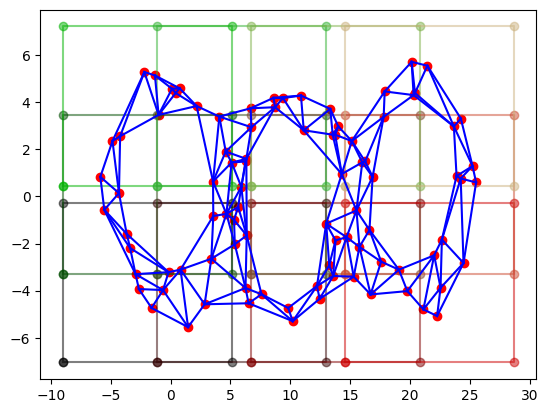

0 [8.532417902341049, 0.08242710227418648]
1 [5.715754302318761, -2.7342364977480997]
2 [2.8990907022964736, -5.550900097770388]
3 [0.08242710227418648, -8.367563697792676]
MorseFunction cover:
 [[[1], [2], [3], [7], [11], [12], [15], [16], [17], [18], [20], [23], [24], [25], [27], [33], [34], [35], [37], [38], [39], [40], [41], [42], [48], [52], [53], [54], [55], [58], [60], [62], [63], [65], [66], [69], [71], [73], [74], [75], [79], [82], [84], [86], [88], [89], [1, 11], [1, 34], [1, 39], [2, 3], [2, 20], [2, 23], [2, 24], [2, 25], [2, 27], [3, 7], [3, 12], [3, 20], [7, 12], [7, 18], [7, 20], [11, 16], [11, 34], [11, 39], [11, 41], [12, 18], [15, 23], [15, 24], [15, 25], [15, 27], [16, 17], [16, 25], [16, 41], [17, 25], [17, 41], [17, 48], [17, 53], [20, 23], [23, 24], [24, 27], [25, 27], [33, 37], [33, 40], [33, 48], [33, 55], [34, 37], [34, 39], [34, 41], [34, 53], [35, 38], [35, 42], [35, 58], [35, 75], [37, 40], [37, 48], [37, 52], [37, 53], [38, 54], [38, 58], [38, 75], [40, 52]

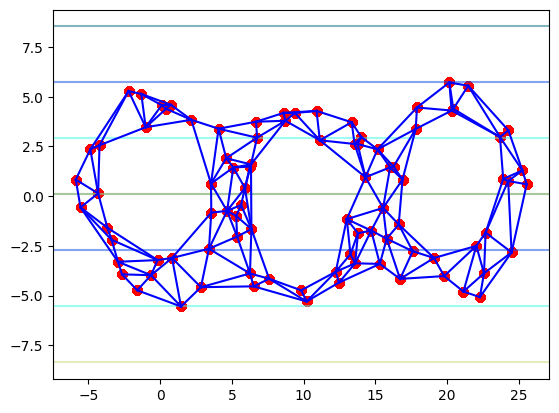

0

In [5]:
###################################
#
#  Example
#
###################################
from sklearn import datasets
from sklearn.datasets import make_circles
import random
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

circle1 = datasets.make_circles(n_samples=30)[0]+ 5 * datasets.make_circles(n_samples=30)[0]

circle2 = datasets.make_circles(n_samples=30)[0]+ 5 * datasets.make_circles(n_samples=30)[0]
circle3 = datasets.make_circles(n_samples=30)[0]+ 5 * datasets.make_circles(n_samples=30)[0]
for circle in circle2:
  circle[0] = circle[0] + 10
for circle in circle3:
  circle[0] = circle[0] + 20

circles_data = np.concatenate([circle1, circle2, circle3])

test_complex = DelaunayComplex(np.array(circles_data),4) #生成2Dmesh
print("edge list:", test_complex.edge_index()) #边

test_complex.draw_complex() #绘制
plt.scatter(circles_data[:,0],circles_data[:,1],color = "red")
plt.show()
#test_VR = VietorisRipsComplex(circles_data, 2)
#test_VR.draw_complex()

a = HyperCube(circles_data,test_complex.edge_index(),#edge_list
              4, #N
              3, #M, the numbers of covers is N*M = 2*1
              0.8 #overlapping degree(0-2)
              )
print("HyperCube cover:\n",a.cover())
a.draw_cover()
#return a list,with N*M sublists represnted N*M different covers(only vertices and edges)

# to compute the localized homology, directly use the cover as the input of BlowupComplex()
# blowup = BlowupComplex(a.cover())
# blowup.compute_persistence()

b = MorseFunction(circles_data,test_complex.edge_index(),#edge_list
                  4,#N,number of covers
                  1,#overlapping degree
                  "y"#direction
                  )
print("MorseFunction cover:\n",b.cover())
b.draw_cover()